## <center>Методи та технології аналітики даних</center>
## <center>Лабораторна робота №2</center>
#### <center>ФБ-25 Кравченко Максим</center>

In [32]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Беремо той ж самий датасет, що і в попередній лабораторній роботі

In [2]:
file_name = r'..\Dataset\adult.data'
headers = ['Age', 'Work_class', 'Final_weight', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 
           'Hours_per_week', 'Native_country', 'Income']
df = pd.read_csv(file_name, sep=",", header=1, names=headers, na_values='?')
df

,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Спочатку давайте перевіримо, чи є в нас пропущені значення

In [3]:
def has_question_mark_str(column):
    return column.astype(str).str.contains('\?', regex=True).any()

def has_question_mark_int(column):
    return column.astype(str).str.contains('\?', regex=True).any()

has_question_str = df.select_dtypes(include=['object']).apply(has_question_mark_str)
has_question_int = df.select_dtypes(include=['int']).apply(has_question_mark_int)

if has_question_str.any() or has_question_int.any():
    print("There are '?' values in the dataframe")
else:
    print("There are no '?' values in the dataframe")

There are '?' values in the dataframe


У нас є пропущені значення в колонці `Work_class`, так як в нас лабораторна робота не вимагає якось обробити пропущені значення, я їх просто видалю

In [4]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df[~df.isin(['?']).any(axis=1)]
print('Missing values were removed')

df

Missing values were removed


,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Збережемо датасет у файл

In [5]:
df.to_csv(r'..\Dataset\adult_cleaned.data', index=False)

1. Рахуємо середнє значення колонки `Age`

In [6]:
average_age = df['Age'].mean()
average_age

38.4375

2. Рахуємо середнє усічене значення колонки `Age` <br>Параметр `0.3` вказує на те, що ми відкидаємо 30% значень з кожного краю

In [13]:
trimmed_avg_age = stats.trim_mean(df['Age'], 0.3)
trimmed_avg_age

37.22654177718833

3. Рахуємо медіану колонки `Age`

In [14]:
median_age = df['Age'].median()
median_age

37.0

4. Рахуємо дисперсію колонки `Age` <br>Цей метод використовує формулу для вибіркової дисперсії (тобто ділить на `n-1`, де `n` - кількість значень)

In [19]:
variance_age = df['Age'].var()
variance_age

172.52641624390728

5. Рахуємо стандартне відхилення колонки `Age`

In [20]:
standard_deviation_age = df['Age'].std()
standard_deviation_age

13.134931147284606

6. Рахуємо середнє відхилення колонки `Age`

In [23]:
mad_age = (df['Age'] - average_age).abs().mean()
mad_age

10.779074104774535

7. Рахуємо абсолютне медіанне відхилення колонки `Age`

In [25]:
absolute_deviation = (df['Age'] - median_age).abs()
mad_age_median = absolute_deviation.median()
mad_age_median

10.0

Нормалізуємо дані колонки `Age` в діапазон від 0 до 1

In [28]:
df['Age_normalized'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df[['Age', 'Age_normalized']]

,Age,Age_normalized
0,38,0.287671
1,53,0.493151
2,28,0.150685
3,37,0.273973
4,49,0.438356
...,...,...
32554,27,0.136986
32555,40,0.315068
32556,58,0.561644
32557,22,0.068493


Рахуємо середню нормалізацію колонки `Age`

In [29]:
df['Age_avg_normalized'] = (df['Age'] - df['Age'].mean()) / mad_age
df[['Age', 'Age_avg_normalized']]

,Age,Age_avg_normalized
0,38,-0.040588
1,53,1.350997
2,28,-0.968311
3,37,-0.133360
4,49,0.979908
...,...,...
32554,27,-1.061084
32555,40,0.144957
32556,58,1.814859
32557,22,-1.524945


На цьому графіку зображено розподіл віку відповідно до сімейного статусу, використовуючи стовбчасту діаграму

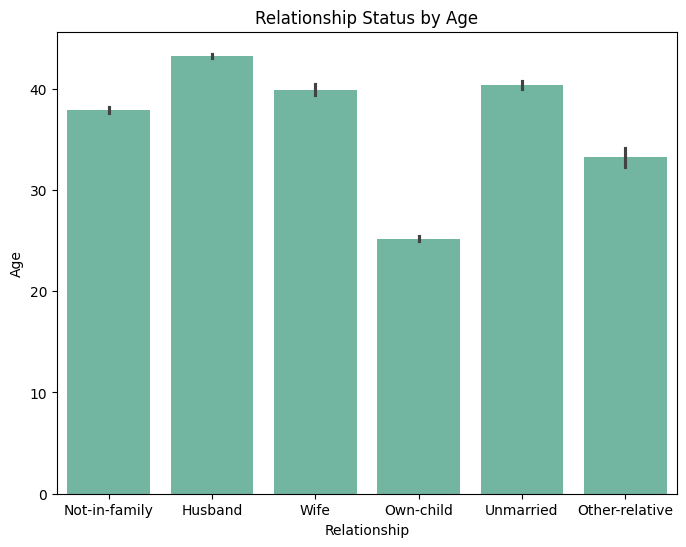

In [58]:
plt.figure(figsize=(8, 6))
plt.title('Relationship Status by Age')
with sns.color_palette("Set2"):
    sns.barplot(data=df, x='Relationship', y='Age')
plt.show()

На цьому графіку зображено залежність між віком та кількістю годин, які людина працює на тиждень

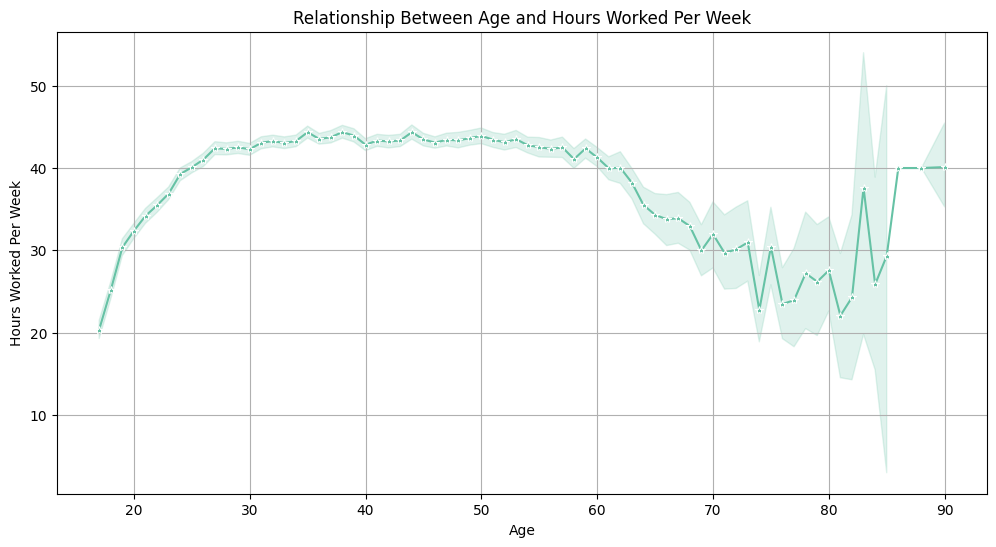

In [74]:
plt.figure(figsize=(12, 6))
with sns.color_palette("Set2"):
    sns.lineplot(data=df, x='Age', y='Hours_per_week', marker='*')
plt.title('Relationship Between Age and Hours Worked Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Worked Per Week')
plt.grid()
plt.show()

На цьому графіку зображено розподіл доходів відповідно до рівня освіти 

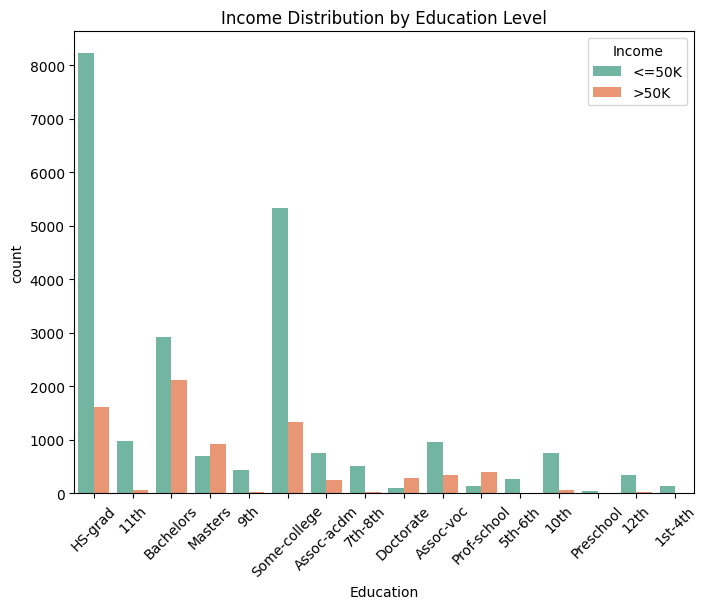

In [76]:
plt.figure(figsize=(8, 6))
with sns.color_palette("Set2"):
    sns.countplot(data=df, x='Education', hue='Income')
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

In [77]:
df

,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Age_normalized,Age_avg_normalized
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.287671,0.1
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.493151,1.6
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.150685,-0.9
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0.273973,0.0
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0.438356,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0.136986,-1.0
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.315068,0.3
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0.561644,2.1
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0.068493,-1.5


Збережемо нормалізований датасет у файл `adult_cleaned_normalized.data`

In [60]:
df.to_csv(r'..\Dataset\adult_cleaned_normalized.data', index=False)

Запишемо обраховані дані в окремий файл

In [79]:
calculations = {
    'Середнє значення `Age`': average_age,
    'Середнє усічене значення `Age`': trimmed_avg_age,
    'Медіана `Age`': median_age,
    'Дисперсія `Age`': variance_age,
    'Стандартне відхилення `Age`': standard_deviation_age,
    'Середнє відхилення `Age`': mad_age,
    'Абсолютне медіанне відхилення `Age`': mad_age_median
}

with open(r'..\Dataset\calculations.txt', 'w', encoding='utf-8') as file:
    for key, value in calculations.items():
        file.write(f"{key}: {round(value, 3)}\n")